# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
#PASO 2
url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/140.0.0.0 Safari/537.36"}

response = requests.get(url, headers=headers)
html = response.text
response

<Response [200]>

In [11]:
#PASO 3
soup = BeautifulSoup(html, 'html.parser')
tablas = soup.find_all('table')
df = pd.read_html(str(tablas[0]))[0]
print(df.head())

  Rank                 Song                 Artist(s) Streams (billions)  \
0    1    "Blinding Lights"                The Weeknd              5.052   
1    2       "Shape of You"                Ed Sheeran              4.574   
2    3            "Starboy"  The Weeknd and Daft Punk              4.119   
3    4  "Someone You Loved"             Lewis Capaldi              4.071   
4    5    "Sweater Weather"         The Neighbourhood              4.059   

        Release date Ref.  
0   29 November 2019  [1]  
1     6 January 2017  [2]  
2  21 September 2016  [3]  
3    8 November 2018  [4]  
4    3 December 2012  [5]  


/tmp/ipykernel_4603/4148946236.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tablas[0]))[0]


In [ ]:
#PASO 4
for columna in df.select_dtypes(include='object').columns:
    df[columna] = df[columna].str.strip()

print(df.head())

  Rank                 Song                 Artist(s) Streams (billions)  \
0    1    "Blinding Lights"                The Weeknd              5.052   
1    2       "Shape of You"                Ed Sheeran              4.574   
2    3            "Starboy"  The Weeknd and Daft Punk              4.119   
3    4  "Someone You Loved"             Lewis Capaldi              4.071   
4    5    "Sweater Weather"         The Neighbourhood              4.059   

        Release date Ref.  
0   29 November 2019  [1]  
1     6 January 2017  [2]  
2  21 September 2016  [3]  
3    8 November 2018  [4]  
4    3 December 2012  [5]  


In [15]:
#PASO 5
conexion = sqlite3.connect("spotify_records.db")
cursor = conexion.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS spotify (
    Rango INTEGER,
    Cancion TEXT,
    Artista TEXT,
    Streams REAL,
    Fecha DATE
)
""")

for i, row in df.iterrows():
    cursor.execute("""
    INSERT INTO spotify (Rango, Cancion, Artista, Streams, Fecha)
    VALUES (?, ?, ?, ?, ?)
    """, (row['Rank'], row['Song'], row['Artist(s)'], row['Streams (billions)'], row['Release date']))

conexion.commit()
conexion.close()


/tmp/ipykernel_4603/1259345106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Song', y='Streams (billions)', data=top10, palette="viridis")


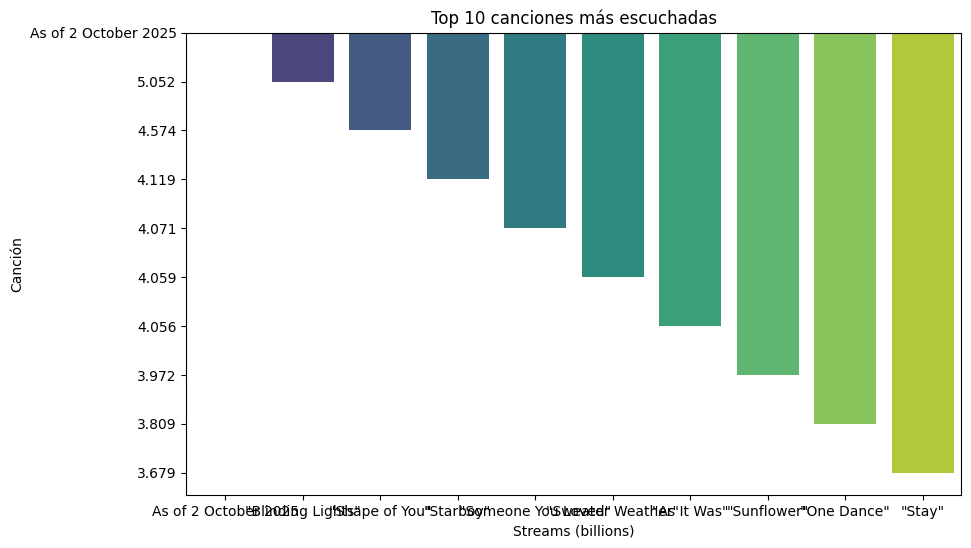

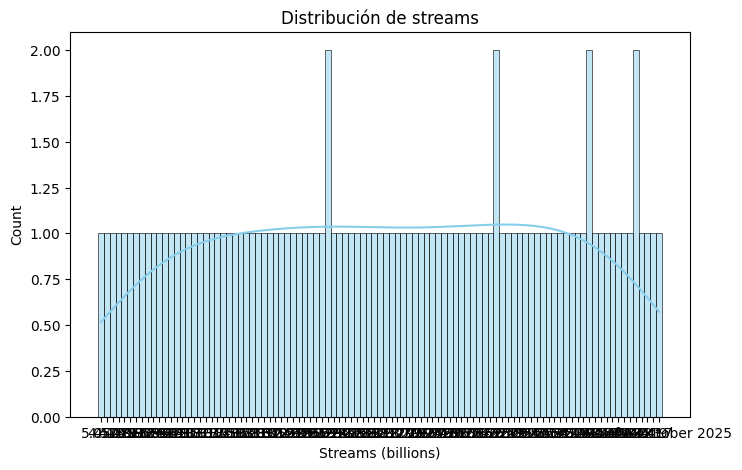

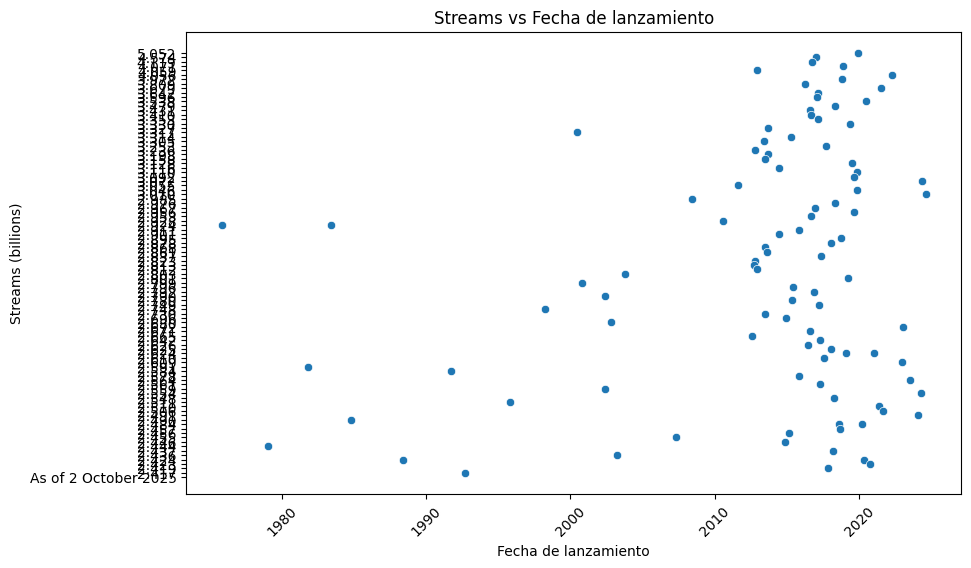

In [ ]:
#PASO 6
top10 = df.sort_values(by='Streams (billions)', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Song', y='Streams (billions)', data=top10, palette="viridis")
plt.xlabel("Streams (billions)")
plt.ylabel("Canción")
plt.title("Top 10 canciones más escuchadas")
plt.show()


plt.figure(figsize=(10,8))
sns.histplot(df['Streams (billions)'], bins=10, kde=True, color='skyblue')
plt.xlabel("Streams (billions)")
plt.title("Distribución de Streams")
plt.show()

plt.figure(figsize=(10,6))
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
sns.scatterplot(x='Release date', y='Streams (billions)', data=df)
plt.xlabel("Fecha de lanzamiento")
plt.ylabel("Streams (billions)")
plt.title("Streams vs Fecha de lanzamiento")
plt.xticks(rotation=45)
plt.show()